In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_IND = df[(df["job_country"] == "India") & (df["job_title_short"] == "Data Analyst")].copy()

In [15]:
df_DA_IND["job_posted_month_no"] = df_DA_IND["job_posted_date"].dt.month


In [5]:
df_DA_IND_explode = df_DA_IND.explode("job_skills")

In [6]:
df_DA_IND_pivot = df_DA_IND_explode.pivot_table(index="job_posted_month_no", columns ="job_skills", aggfunc='size', fill_value=0)

df_DA_IND_pivot.loc["Total"] = df_DA_IND_pivot.sum()

df_DA_IND_pivot = df_DA_IND_pivot[df_DA_IND_pivot.loc["Total"].sort_values(ascending=False).index]

df_DA_IND_pivot = df_DA_IND_pivot.drop("Total")




In [ ]:
DA_totals = df_DA_IND.groupby("job_posted_month_no").size()

DA_totals


job_posted_month_no
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
dtype: int64

In [27]:
df_DA_IND_percent = df_DA_IND_pivot.div(DA_totals/100, axis=0)

df_DA_IND_percent = df_DA_IND_percent.reset_index()
df_DA_IND_percent['job_posted_month'] = df_DA_IND_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_IND_percent = df_DA_IND_percent.set_index('job_posted_month')
df_DA_IND_percent = df_DA_IND_percent.drop(columns='job_posted_month_no')

df_DA_IND_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.159236,0.000000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.000000,0.236967,0.000000,0.000000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.359712
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.218818,0.000000,0.218818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


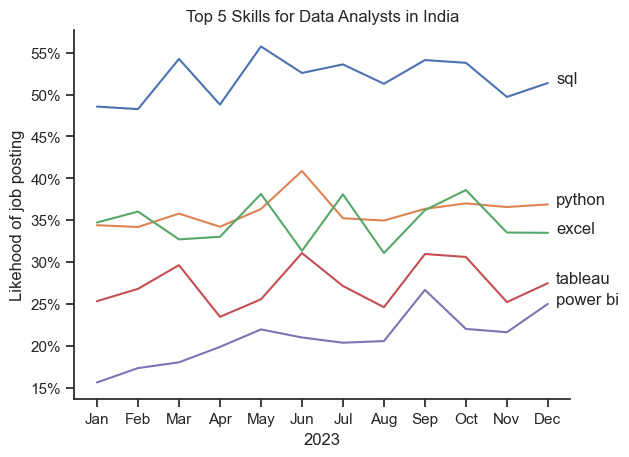

In [34]:
df_plot = df_DA_IND_percent.iloc[:,:5]

sns.lineplot(data=df_plot, dashes=False)
sns.set_theme(style= "ticks")

plt.legend().remove()
plt.xlabel("2023")
plt.ylabel("Likehood of job posting")
plt.title("Top 5 Skills for Data Analysts in India")

from matplotlib.ticker import PercentFormatter

plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
sns.despine() # remove top and right spines

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])
